# MARVEL - Social Network Analysis

## Group B

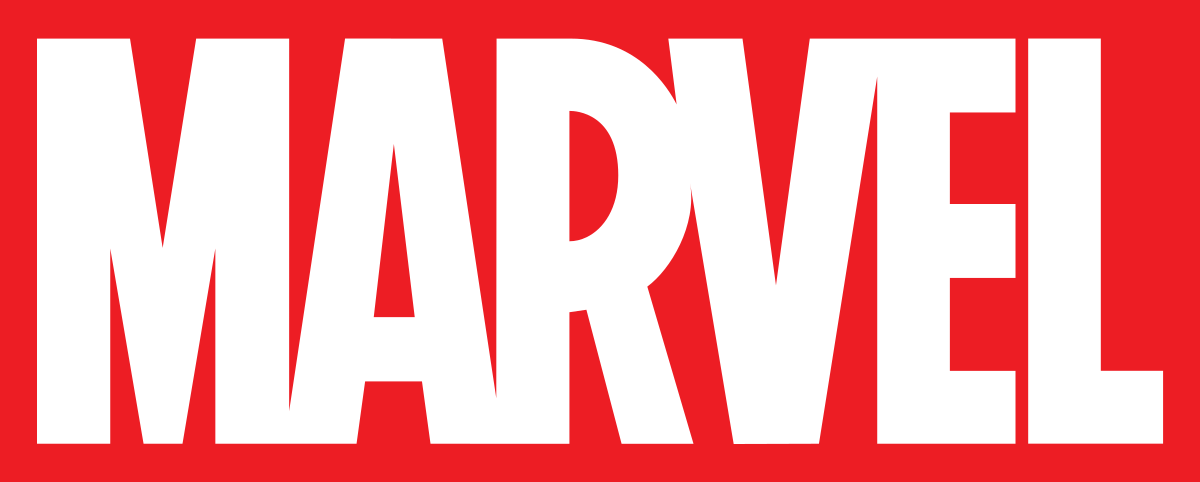

In [1]:
from IPython.display import Image                        
url='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Marvel_Logo.svg/1200px-Marvel_Logo.svg.png'
Image(url,width=900, height=800)

######  "Marvel Comics is one of the world's most prominent character-based entertainment companies, built on a proven library of more than 8,000 characters featured in a variety of media over seventy-five years.

Marvel counts among its characters such well-known superheroes as Spider-Man, Iron Man, Captain America, the Hulk, Thor, Wolverine, Ant-Man, the Wasp, Black Widow, Hawkeye, Captain Marvel, Black Panther, Doctor Strange, the Scarlet Witch, Quicksilver, She-Hulk, the Vision, the Falcon, the Winter Soldier, Ghost Rider, Blade, Daredevil, Luke Cage, Iron Fist, Ms. Marvel, Miles Morales, the Punisher and Deadpool. Superhero teams exist such as the Avengers, the X-Men, the Fantastic Four and the Guardians of the Galaxy."

# Import and Cleaning Data

In [2]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px

from igraph import *

from IPython.display import display
from PIL import Image

hero_network_df = pd.read_csv('hero-network.csv', sep=',',encoding= 'unicode_escape')
graphdf = Graph.DataFrame(hero_network_df, directed=False)
print('edge count:', graphdf.ecount())
print('node count:', graphdf.vcount())


ModuleNotFoundError: No module named 'plotly'

# Degree distribution

In [ ]:
data = graphdf.get_vertex_dataframe()
data['degree'] = graphdf.degree(mode='all')
print('Maximum degree:', data["degree"].max())
print('Minimum degree:', data["degree"].min())
plt.hist(data['degree'])


## After analyzing the maximum and minimum degrees we can appreciate the majority of the actors have very low 
## degree and also see there are actors with very high degrees

# Centrality Measures

In [3]:
data['closeness'] = graphdf.closeness()
data['betweeness'] = graphdf.betweenness()
data['pageRank'] = graphdf.pagerank()


NameError: name 'graphdf' is not defined

In [4]:
## Search for highest degree among characters

data_deg = data.sort_values(by=['closeness'], ascending = False)
print('Hihgest closeness characters:\n', data.head(10))

NameError: name 'data' is not defined

In [ ]:
## Search for highest betweeness among characters

data_between = data.sort_values(by=['betweeness'], ascending = False)
print('Highest betweeness characters:\n', data.head(10))

# Network Diameter and Average Path Length

In [ ]:
graph_diameter = graphdf.diameter()
print('Graph Diameter:', graph_diameter)

In [ ]:
average_path = graphdf.average_path_length()
print('Average Path Length:', average_path)

In [ ]:
### As the data set is so big, we decided to analyse the connections and graphs of the main characters 
### (50 with the higherst degrees)
 
main_char_df = data_deg.head(50)
main_char_list = main_char_df['name'].tolist() 


def is_involved_main_char(row, main_char_list):
    if row['hero1'] in main_char_list:
        if row['hero2'] in main_char_list:
                return True
    return False

hero_network_df['isMainChar'] = hero_network_df.apply(lambda row: is_involved_main_char(row, main_char_list), axis=1)
hero_network_df_main_char = hero_network_df[hero_network_df['isMainChar']==True]
hero_network_df_main_char.reset_index(inplace=True, drop=True)


In [ ]:
print(len(hero_network_df_main_char.index))


In [ ]:
graphdf_main= Graph.DataFrame(hero_network_df_main_char, directed=False)


In [ ]:
data_main = graphdf_main.get_vertex_dataframe()


In [ ]:
### We can see there are no community since the relationship between characters is extremely centralized.
### We can see there are two outliers: Miss America & Patriot.

plot(graphdf_main, 
     vertex_label = graphdf_main.vs["name"],
     vertex_size = 10,
     vertex_label_dist = 1.5,
     vertex_label_size = 10,
    )

In [ ]:
print(len(data_main.index))